In [20]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import sys


feat_path = os.path.join(os.path.abspath(os.path.dirname(os.path.dirname(os.getcwd()))))
if feat_path not in sys.path:
    sys.path.append(feat_path)
    
%load_ext autoreload
%autoreload 2

np.random.seed(42)


# get additional tools
from src.utils import utils 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# Define path where data is located and folder to access to it
path_data = os.path.join(os.path.abspath(os.path.dirname(os.getcwd())),'data','external')



In [13]:
os.path.join(os.path.abspath(os.path.dirname(os.getcwd())),'data','external')

'/mnt/data/external'

In [15]:
# load data in pd dataframe
train, test = utils.load_data(path_data)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
train['binary_sex'] = pd.get_dummies(train['Sex'])['female']
train['more_than_one_sib_sp'] = np.where(train['SibSp'] > 1, 1, 0)
train['more_than_one_parch'] = np.where(train['Parch'] > 1, 1, 0)
train['is_first_class'] = pd.get_dummies(train, columns = ['Pclass'])['Pclass_1']
train['is_second_class'] = pd.get_dummies(train, columns = ['Pclass'])['Pclass_2']
#train['more_than_one_parch'] = np.where(train['Parch'] > 1, 1, 0)

In [75]:
train['normalized_fare']=(train['Fare']-train['Fare'].min())/(train['Fare'].max()-train['Fare'].min())

In [76]:
train['normalized_fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: normalized_fare, Length: 891, dtype: float64

In [35]:
pd.get_dummies(train, columns = ['Pclass', 'Sex'])

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,binary_sex,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,1,0,0,1,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,1,1,0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1,0,0,0,1


array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

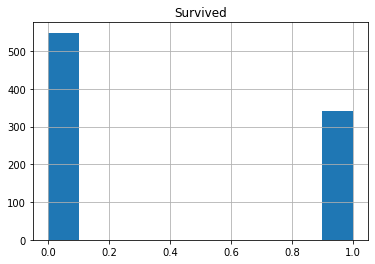

In [22]:
train.hist(column='Survived')

array([[<AxesSubplot:title={'center':'Pclass'}>]], dtype=object)

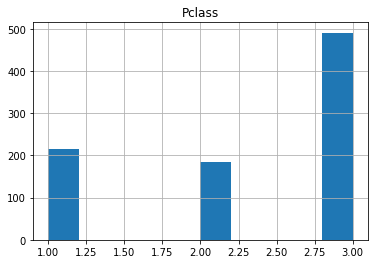

In [23]:
train.hist(column='Pclass')

array([[<AxesSubplot:title={'center':'binary_sex'}>]], dtype=object)

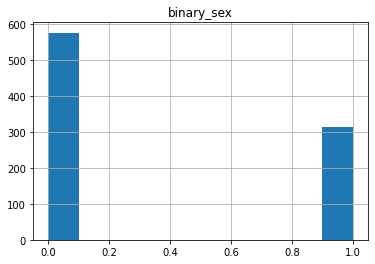

In [33]:
train.hist(column='binary_sex')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

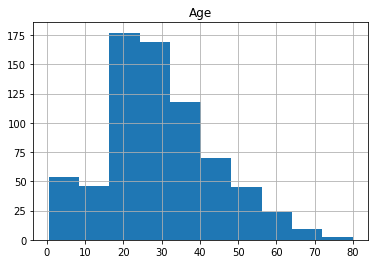

In [36]:
train.hist(column='Age')

<AxesSubplot:>

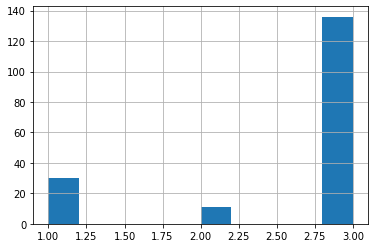

In [43]:
train[pd.isna(train.Age)]['Pclass'].hist()

<AxesSubplot:>

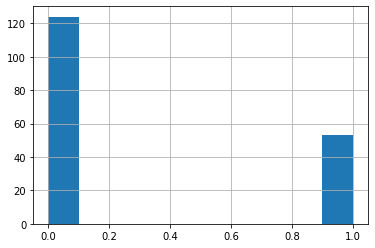

In [44]:
train[pd.isna(train.Age)]['binary_sex'].hist()

Most people of undetermined age are from the third class, more men but the difference is not as striking here

array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

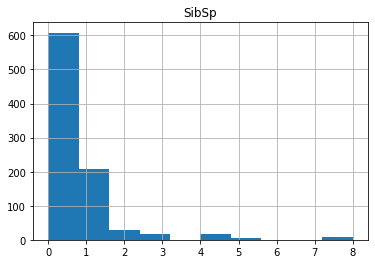

In [56]:
train.hist(column = 'SibSp')

Can be bucketed as with or without

array([[<AxesSubplot:title={'center':'Parch'}>]], dtype=object)

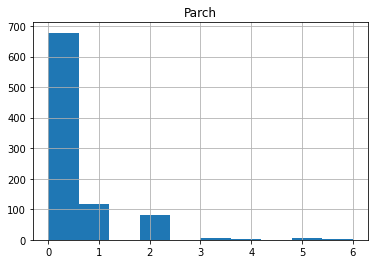

In [57]:
train.hist(column = 'Parch')

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

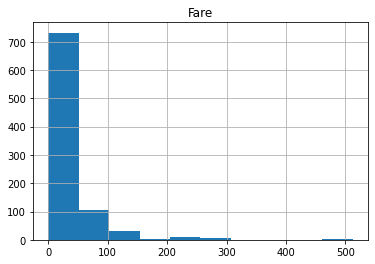

In [58]:
train.hist(column = 'Fare')

array([[<AxesSubplot:title={'center':'normalized_fare'}>]], dtype=object)

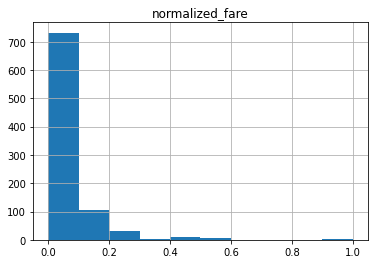

In [77]:
train.hist(column = 'normalized_fare')

<AxesSubplot:>

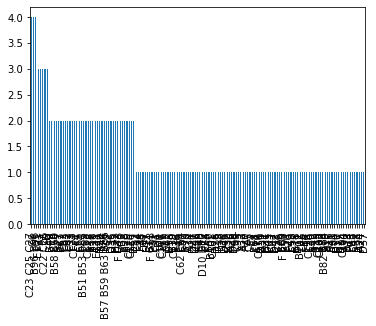

In [65]:
train['Cabin'].value_counts().plot(kind='bar')

In [68]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

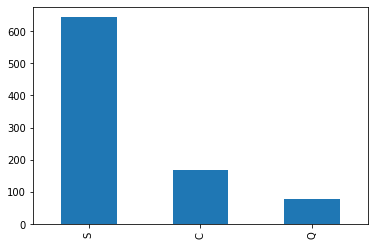

In [69]:
train['Embarked'].value_counts().plot(kind='bar')

In [74]:
train.corr(method = 'pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,binary_sex,more_than_one_sib_sp,more_than_one_parch,is_first_class,is_second_class
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.069351,-0.024742,0.034303,-0.000086
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,-0.070281,0.056346,0.285904,0.093349
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.127327,0.016011,-0.885924,-0.188432
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,-0.303054,-0.214106,0.348941,0.006954
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,0.805547,0.420076,-0.054582,-0.055932
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,0.311798,0.838465,-0.017633,-0.000734
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.119825,0.202590,0.591711,-0.118557
binary_sex,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.067438,0.201880,0.098013,0.064746
more_than_one_sib_sp,-0.069351,-0.070281,0.127327,-0.303054,0.805547,0.311798,0.119825,0.067438,1.000000,0.330886,-0.094326,-0.063112
more_than_one_parch,-0.024742,0.056346,0.016011,-0.214106,0.420076,0.838465,0.202590,0.201880,0.330886,1.000000,-0.008743,-0.014539
